---

# 쇼핑몰 데이타 분석하기

지그재그는 여성 패션 쇼핑몰들의 상품 정보를 통합적으로 제공하는 플랫폼으로 개인 취향 알고리즘을 통해 적절한 제품을 추천하여 유저 경험을 높이고 있습니다. 지그재그에 입점한 2,700여 개의 온라인 쇼핑몰들에서는 하루에 10,000여 개의 패션 아이템이 업데이트되며 한 달에 200만 명이 넘는 사용자들이 방문해 자신이 좋아하는 상품을 실시간으로 발견하고 있습니다. 런칭 2년 반 만에 1,000만 앱 다운로드를 돌파하며 대한민국 여성의 쇼핑 필수 앱으로 자리 잡았습니다.

---

## set options

In [1]:
# 데이터를 다루는 library인 padas를 import합니다.
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

##  데이타가져오기

**1. 주문 정보 가져오기** : 2016년 6월 11일 하루 주문 정보

     - timestamp는 주문시각
     - user_id는 주문을 한 유저의 고유 아이디,
     - goods_id는 상품의 id
     - shop_id는 쇼핑몰의 id
     - price는 상품의 가격

In [3]:

order = pd.read_csv('./data/shoppingmall/order_info.csv')
order.head()


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


**2. order 테이블을 이용해 지그재그의 당일 매출 상위 10개 쇼핑몰을 구해주세요.**

    (쇼핑몰별 매출 정보를 피벗 테이블을 이용)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>price</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
    </tr>
  </tbody>
</table>

In [4]:
table = pd.pivot_table(order,
                                   values = 'price',
                                   index = 'shop_id',
                                   aggfunc = 'sum')

table.sort_values(( 'price'), ascending=False).head(10)

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.**

( 같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있기 때문에 매출과 결제 건수를 함께 볼 수 있는 피벗테이블 작성 )

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>sum</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>price</th>
      <th>price</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
      <td>99</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
      <td>42</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
      <td>39</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
      <td>37</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
      <td>30</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
      <td>27</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
      <td>24</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
      <td>23</td>
    </tr>
    <tr>
      <th>28</th>
      <td>389270</td>
      <td>20</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
      <td>19</td>
    </tr>
  </tbody>
</table>

![](https://i.imgur.com/T6VRYf6.png)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [6]:
table = pd.pivot_table(order,
                                   values = 'price',
                                   index = 'shop_id',
                                   aggfunc = ['sum', 'count'])

table.columns = ['sum', 'count']
table = table.sort_values('sum', ascending=False).head(10)
table

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


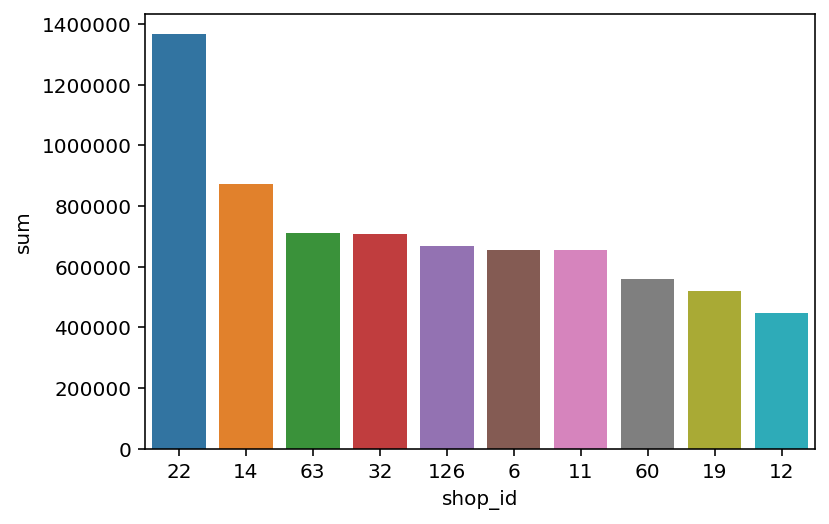

In [7]:
# head(10)를 구해서 그래프 출력
table_top10 = table.head(10)
sns.barplot(data=table_top10, x=table_top10.index, y='sum', order=table_top10.index)

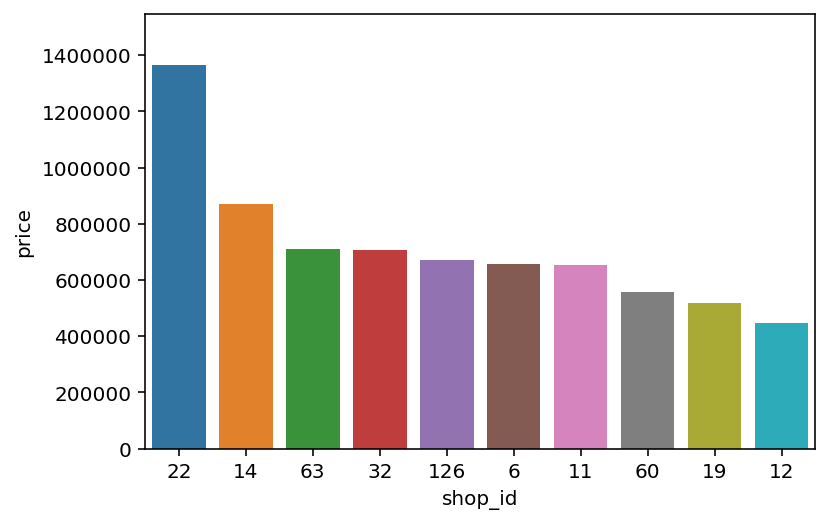

In [8]:
# 다른 방식으로 출력
top10_index = table_top10.index
sns.barplot(data=order, x='shop_id', y='price',estimator=sum, order=table_top10.index, errwidth=0)

**4. 시간대별 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.**


지그재그 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 to_datetime을 이용하여 datetime 자료형으로 만든 뒤, 이를 이용하여 시간대별 총 매출량을 구해주세요.
x를 timestamp, y를 price로 놓는 경우 다음과 같은 그래프가 나오게 됩니다. 

![](https://i.imgur.com/5cqEAAj.png)

In [9]:
import matplotlib as mpl

sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.

mpl.rc('font', family='Malgun Gothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

In [10]:
order['timestamp'] = pd.to_datetime(order['timestamp'])
order.dtypes

timestamp    datetime64[ns]
user_id              object
goods_id              int64
shop_id               int64
price                 int64
dtype: object

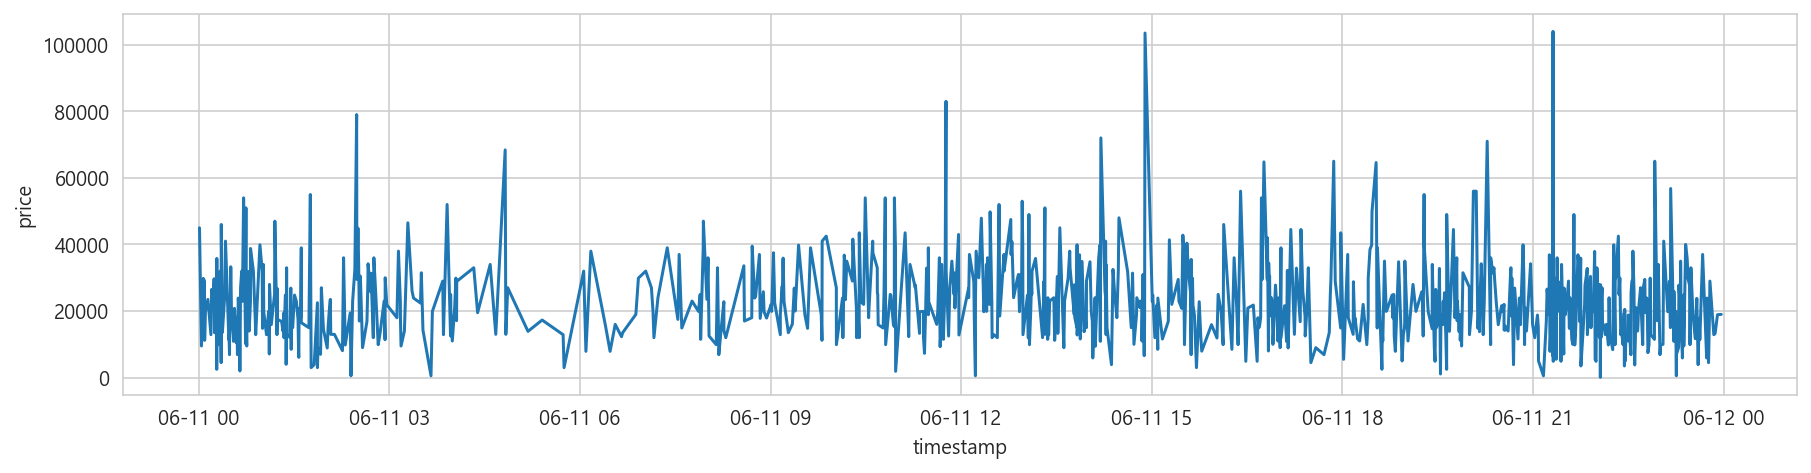

In [11]:
plt.figure(figsize=[15,3.5])
sns.lineplot(x='timestamp', y='price', data=order)

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.**

위의 시각화는 적절하지 못한 시각화입니다. 정확하게는 x시 00분 ~ x시 59분 까지의 매출을 시간대별로 모두 합하는 binning 과정을 거친 뒤 시각화를 진행해야 원하는 결과를 얻을 수 있습니다.

order 테이블에 로그의 발생 시간을 나타내는 hour 칼럼을 추가한 뒤, pivot_table을 이용하여 시간대별 매출을 구해주세요. 그리고, 이를 이용해 아래와 같은 그래프를 만들어 주세요.

- order['hour'] = order['timestamp'].dt.hour

*lineplot을 사용하는 경우*
![](https://i.imgur.com/sGVLJKi.png)

*pointplot을 사용하는 경우*
![](https://i.imgur.com/hYuKVqE.png)

In [12]:
order['hour'] = order['timestamp'].dt.hour

table = order.pivot_table(values='price',
                                         index='hour',
                                         aggfunc='sum')

table.head()

,price
hour,
0,1479210
1,990300
2,787830
3,467650
4,304800


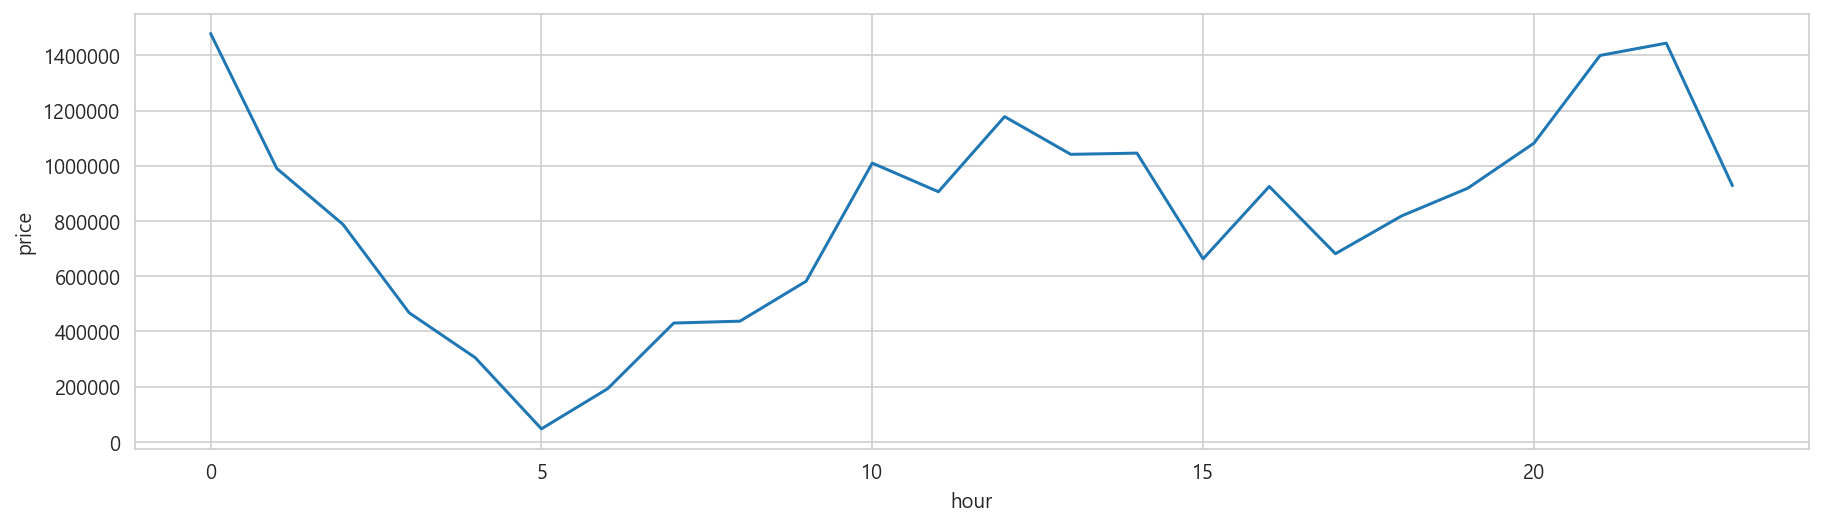

In [13]:
plt.figure(figsize=[15,4])
sns.lineplot(data=table, x=table.index, y='price')

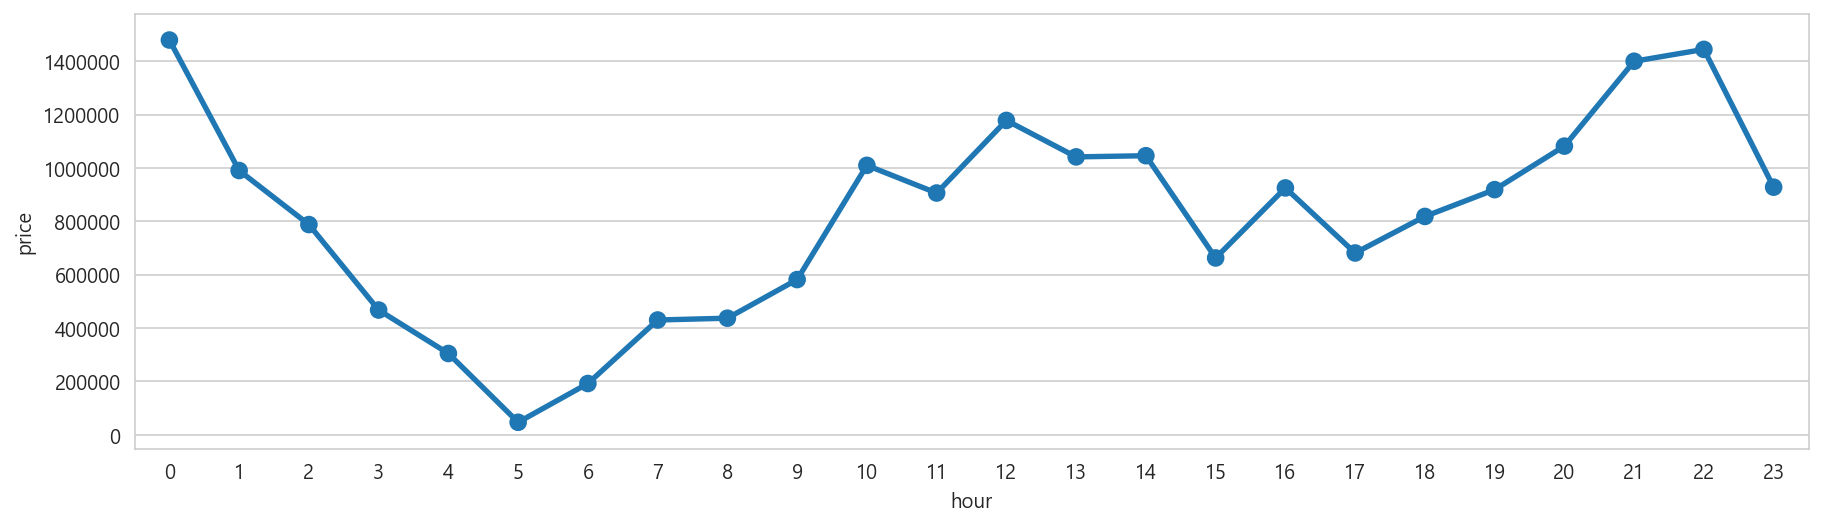

In [14]:
plt.figure(figsize=[15,4])
sns.pointplot(data=table, x=table.index, y='price')

**6 . user 테이블을 불러와 order 테이블과 병합해주세요.**


user 테이블에는 고객의 고유 아이디를 나타내는 user_id, 그리고 접속 기기정보를 나타내는 os, 그리고 나이정보 age가 있습니다. 이를 이용해 top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석하고자 합니다. 

데이터베이스에서 user 테이블을 불러온 뒤, order 테이블과 병합해주세요.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
      <td>0</td>
      <td>And</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
      <td>0</td>
      <td>And</td>
      <td>34</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
  </tbody>
</table>

In [15]:
user = pd.read_csv('./data/shoppingmall/user_info.csv')
print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [16]:
merged = order.merge(user, on='user_id')
merged.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현하고자 합니다. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화를 해야 합니다. 시각화 결과가 아래의 둘 중 하나가 나오게 해주세요.

![](https://i.imgur.com/roHlnXi.png)

In [17]:
# 위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 확인하고자 하는데
# 나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한다

print(top10_index) # 비교하기 위해 출력

merged_top10 = merged[(merged['shop_id'].isin(top10_index)) & (merged['age'] != -1)]
merged_top10.head(20)



Int64Index([22, 14, 63, 32, 126, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')


,timestamp,user_id,goods_id,shop_id,price,hour,os,age
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,0,iOS,21
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,0,iOS,22
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,0,iOS,24
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,0,And,27
10,2018-06-11 00:12:12.469,_t38UxRGHDKAsgc7nJhxz0e7q3pIj-RD,4521,19,26500,0,iOS,44
16,2018-06-11 10:53:34.715,hZrcB-RV5EqL94ysDGcrQ1TZKlhSeS7L,6365,22,24700,10,iOS,26
20,2018-06-11 00:17:45.978,B3yaMZ62HOH0shQOKjo4QPV6PLcobUsT,6242,63,18900,0,iOS,28
21,2018-06-11 00:18:21.226,-L2Awbp23c9b1o1R_do--BZEtPivAUua,2941,126,23900,0,iOS,26
23,2018-06-11 00:32:50.981,3ntrLPHn8Xu0IsVQ1z00T2g1FnaJG6jf,3339,22,10900,0,iOS,17


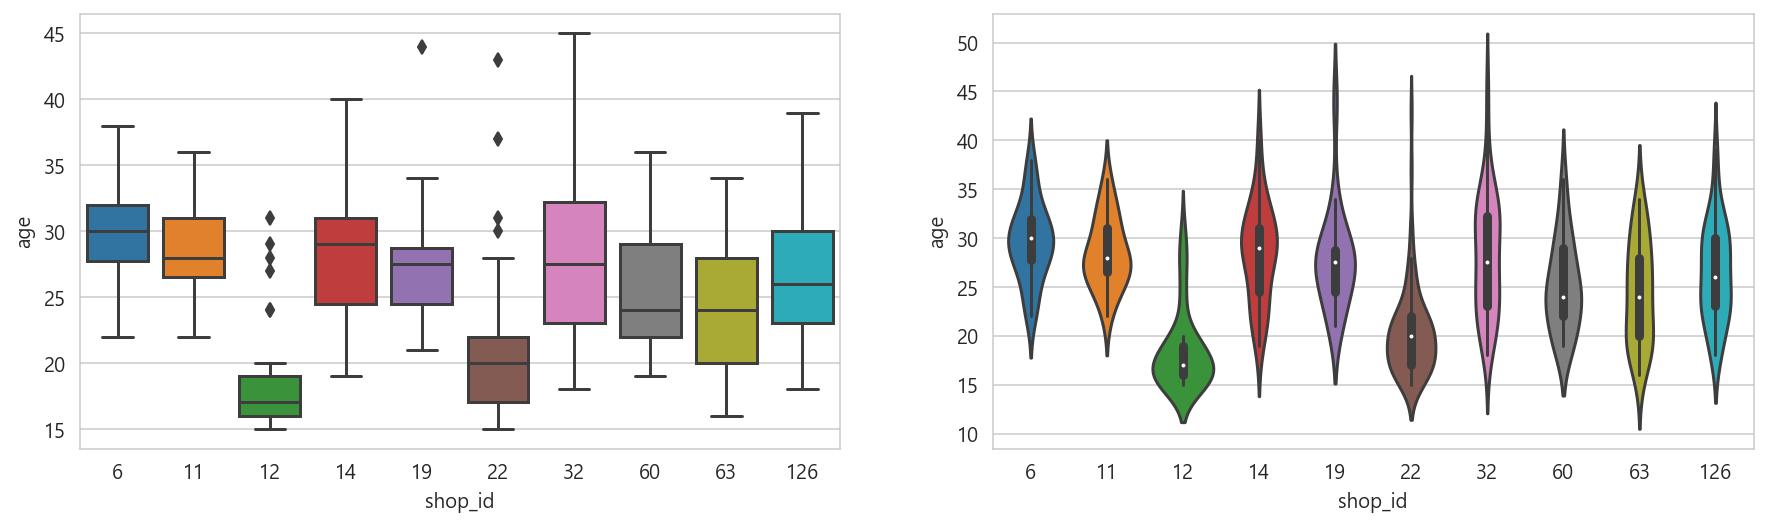

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches([15,4])

sns.boxplot(data = merged_top10, x='shop_id', y='age', ax=ax1)
sns.violinplot(data = merged_top10, x='shop_id', y='age', ax=ax2)

fig.savefig('figure.png', dpi=400)

**8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증해주세요.**

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

아래의 함수를 이용해 user 테이블에 연령대를 만들어주세요.

In [19]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 < 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

    
print(make_generation(10))
print(make_generation(23))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(40))

10대
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [20]:
age_list = ['10대', '20대 초반', '20대 중반', '20대 후반', '30대 초반', '30대 중반', '30대 후반']
for i in age_list:
    user["연령대"] = user['age'].map(make_generation)
user.head()

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반


shop 데이타를 불러와서 user, order 테이블과 병합해주세요.

병합 결과는 다음과 같게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age_x</th>
      <th>연령대</th>
      <th>name</th>
      <th>category</th>
      <th>age_y</th>
      <th>style</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 07:33:39.823</td>
      <td>ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL</td>
      <td>2278</td>
      <td>38</td>
      <td>37000</td>
      <td>7</td>
      <td>And</td>
      <td>32</td>
      <td>30대 초반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 12:56:27.867</td>
      <td>MnvhmV0tA89bN9TLXgRTbLza689bTkT9</td>
      <td>5513</td>
      <td>38</td>
      <td>31000</td>
      <td>12</td>
      <td>And</td>
      <td>37</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 22:57:11.582</td>
      <td>3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB</td>
      <td>7026</td>
      <td>38</td>
      <td>17100</td>
      <td>22</td>
      <td>iOS</td>
      <td>34</td>
      <td>30대 중반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
      <td>10대 후반</td>
      <td>Rachel</td>
      <td>의류</td>
      <td>10대/20대 초반</td>
      <td>러블리/심플베이직</td>
    </tr>
  </tbody>
</table>

In [21]:
# shop = pd.read_csv('./data/shoppingmall/shop_info.csv')
shop = pd.read_csv('./data/shoppingmall/shop_info.csv', index_col='shop_id')
print(shop.shape)
shop.head()

(200, 4)


,name,category,age,style
shop_id,,,,
1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [22]:
merged_table = order.merge(user, on='user_id').merge(shop, on='shop_id')

merged_table.head()

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
2,2018-06-11 12:56:27.867,MnvhmV0tA89bN9TLXgRTbLza689bTkT9,5513,38,31000,12,And,37,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
3,2018-06-11 22:57:11.582,3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB,7026,38,17100,22,iOS,34,30대 중반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌
4,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17,10대,Rachel,의류,10대/20대 초반,러블리/심플베이직


병합한 테이블을 이용하여 '거래연령 일치여부' 칼럼을 아래의 칼럼을 이용하여 만들어 주세요. 각 열이 아닌 각 행에 함수를 적용할 때는 `apply(function, axis=1)`을 이용해야 합니다.

In [23]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

In [24]:
merged_table['거래연령 일치여부'] = merged_table.apply(check_generation, axis=1)
merged_table.head(2)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True


피벗 테이블을 이용한 결과가 다음과 같이 나오게 됩니다.


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.666667</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.937500</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.400000</td>
      <td>5</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.000000</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.000000</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

In [25]:
table = merged_table.pivot_table(values='거래연령 일치여부',
                                                    index='shop_id',
                                                    aggfunc=['mean', 'count'])

table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.400000,5
4,1.000000,1
5,0.000000,1


위의 정보를 Top 10 쇼핑몰에 대해 뽑아보면 다음과 같은 결과가 나옵니다. 

`table[table.index.isin(top10_index)]`

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>0.750000</td>
      <td>24</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.684211</td>
      <td>19</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.857143</td>
      <td>42</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.566667</td>
      <td>30</td>
    </tr>
    <tr>
      <th>19</th>
      <td>0.789474</td>
      <td>19</td>
    </tr>
    <tr>
      <th>22</th>
      <td>0.929293</td>
      <td>99</td>
    </tr>
    <tr>
      <th>32</th>
      <td>0.540541</td>
      <td>37</td>
    </tr>
    <tr>
      <th>60</th>
      <td>0.695652</td>
      <td>23</td>
    </tr>
    <tr>
      <th>63</th>
      <td>0.000000</td>
      <td>27</td>
    </tr>
    <tr>
      <th>126</th>
      <td>0.000000</td>
      <td>39</td>
    </tr>
  </tbody>
</table>

In [26]:
table[table.index.isin(top10_index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.750000,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

----